# Llama 3.2 Multimodal Prompting

## Objective:

This notebook demonstrates how to prompt Llama 3.2 models for text and image-based tasks.

Here are the steps we will cover:
 1. How to set up and use Llama 3.1 and 3.2 models (check utils.py for details)
 2. How to conduct text-based conversations with the model
 3. How to perform image-based question answering using both web and local images
 4. How to ask follow-up questions about images
 5. How to create a helper function for easier image-based prompting

In [16]:
# warnings 
import warnings
warnings.filterwarnings('ignore')

# helper functions 
from utils import llama31, llama32

# venv
from dotenv import load_dotenv
load_dotenv()

True

## Basic Text Conversation

In [17]:
messages = [
    {'role': 'user', 'content': 'hello'}
]

In our use case, we will be using Llama3.1 and Llama3.2 70B and 90B, and 110B


In [18]:
llama32(messages, model_size= 90)


'Hello! How can I assist you today?'

We can provde a response to the model messages to continue the conversation 

In [20]:
response = llama32(messages, model_size = 90)

# now extend the conversation 

messages = [
    {
        'role': 'user',
        'content': 'Hello'
    },
    {
        'role': 'assistant',
        'content': response
    },
    {
        'role': 'user',
        'content': 'What is the capital of Finland?'
    }
]

response = llama32(messages, model_size = 90)

response

'Déjà vu! The capital of Finland is indeed Helsinki. How can I assist you today?'

## Image Based Question Answering


In [22]:
from utils import disp_image # use to display image from a web or local 

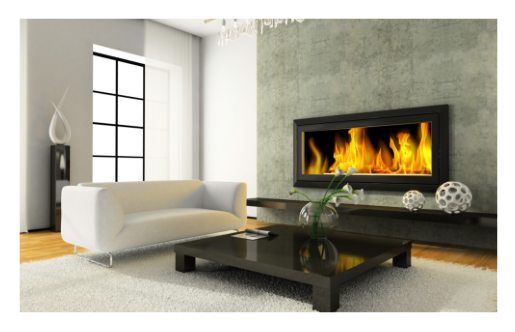

In [24]:
disp_image('images/001.jpeg')

### Image from a URL

In [27]:
image_url = 'https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png'

messages = [
    {'role': 'user',
     'content': [
         {'type': 'text', 'text': 'Describe the image in a few words?'},
         {'type': 'image_url', 'image_url': {'url': image_url}}
         ]
    }
]

response = llama32(messages, model_size = 11)

print(response)

The image displays the Google logo.


### Using a Local Image

To use local image, we need to convert it to a base64 encoded string


In [31]:
import base64

# helper function to encode image
def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
base64_image = encode_image('images/001.jpeg')

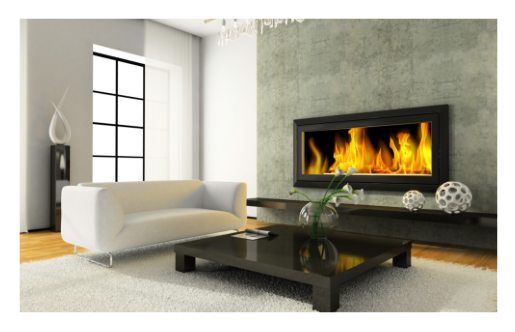

In [35]:
disp_image('./images/001.jpeg')


In [33]:
# messages 

messages = [
    {'role':'user',
     'content': [
         {'type': 'text', 'text': 'Describe the image in a few words?'},
         {'type': 'image_url', 'image_url': {'url': f'data:image/jpeg;base64,{base64_image}'}}
     ]}
]


response = llama32(messages, model_size = 11)

print(response)

The image depicts a modern living room with a fireplace.


### Follow up question on an image

In [36]:

messages = [
    {'role':'user',
     'content': [
         {'type': 'text', 'text': 'Describe the image in a few words?'},
         {'type': 'image_url', 'image_url': {'url': f'data:image/jpeg;base64,{base64_image}'}}
     ]},
     {'role': 'assistant',
      'content': response},
      {'role': 'user',
       'content': 'What is the couch color?'}
]

response = llama32(messages, model_size = 11)

print(response)


The couch is white.


Createa a helper to make it easier ask question with image

In [39]:
def llama32pi(prompt, image_url, model_size = 90):
    messages = [
        {'role': 'user',
         'content': [
             {"type": 'text', 'text': prompt},
             {"type": 'image_url', 'image_url': {'url': image_url}}
         ]
        }
    ]
    response = llama32(messages, model_size = model_size)
    return response 


In [40]:
# ask question with url image
print(llama32pi("describe the image in one sentence",
                "https://raw.githubusercontent.com/meta-llama/"
                "llama-models/refs/heads/main/Llama_Repo.jpeg"))

The image depicts three llamas, one of which is purple and wearing a party hat, standing behind a table with a glass of beer on it.


In [42]:
# ask question with local image
print(llama32pi('describe the image in one sentence',
                f'data:image/jpeg;base64,{base64_image}'))

# don't forget we still have to encode the image to base64 first5

The image depicts a modern living room with a fireplace, featuring a white couch and a black coffee table.
